# **Proyecto Integrador de Deep Learning #2**

In [1]:
import pandas as pd
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
btc = pd.read_csv(r'Data\btc_1d_data_2018_to_2025.csv')
btc['Open time'] = pd.to_datetime(btc['Open time'], format='%Y-%m-%d')

#eliminar columna ignore
btc = btc.drop(columns=['Ignore'])

## **Análisis Exploratorio de Datos**

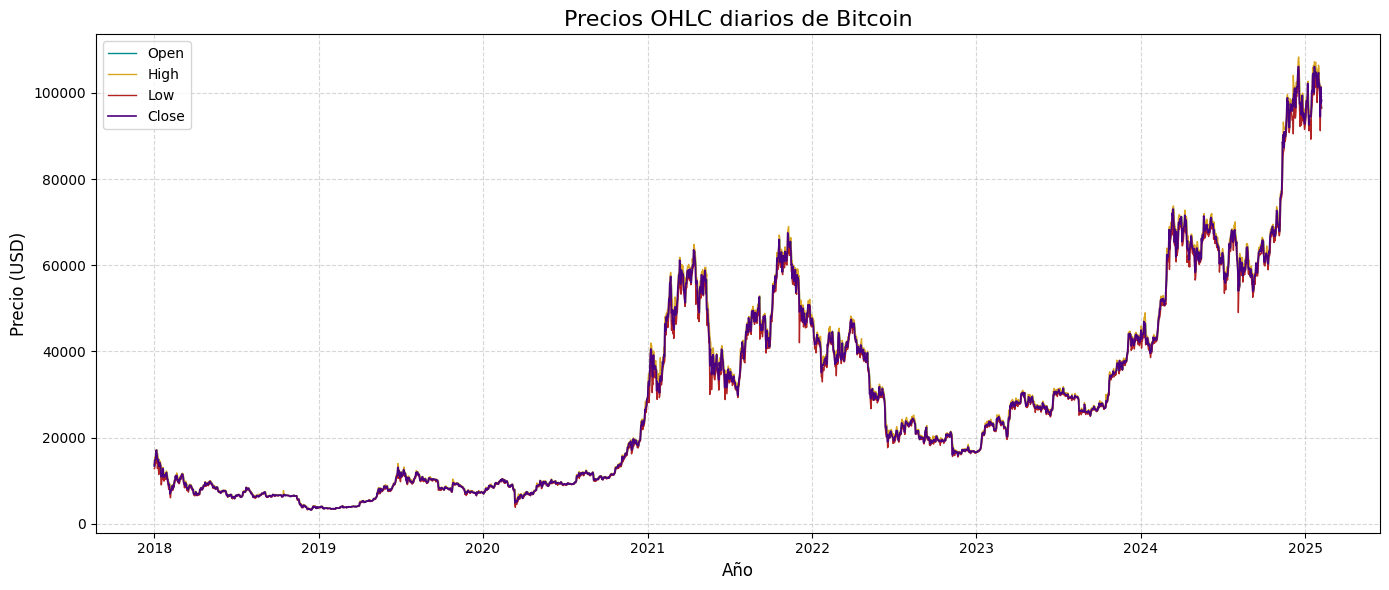

In [3]:
plt.figure(figsize=(14,6))

# Graficar cada precio
plt.plot(btc['Open time'], btc['Open'], label="Open", color="darkcyan", linewidth=1)
plt.plot(btc['Open time'], btc['High'], label="High", color="goldenrod", linewidth=1)
plt.plot(btc['Open time'], btc['Low'], label="Low", color="firebrick", linewidth=1)
plt.plot(btc['Open time'], btc['Close'], label="Close", color="indigo", linewidth=1.2)

# Formato de fechas
ax = plt.gca()
ax.xaxis.set_major_locator(mdates.YearLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Títulos y ejes
plt.title("Precios OHLC diarios de Bitcoin", fontsize=16)
plt.xlabel("Año", fontsize=12)
plt.ylabel("Precio (USD)", fontsize=12)

# Mejoras visuales
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


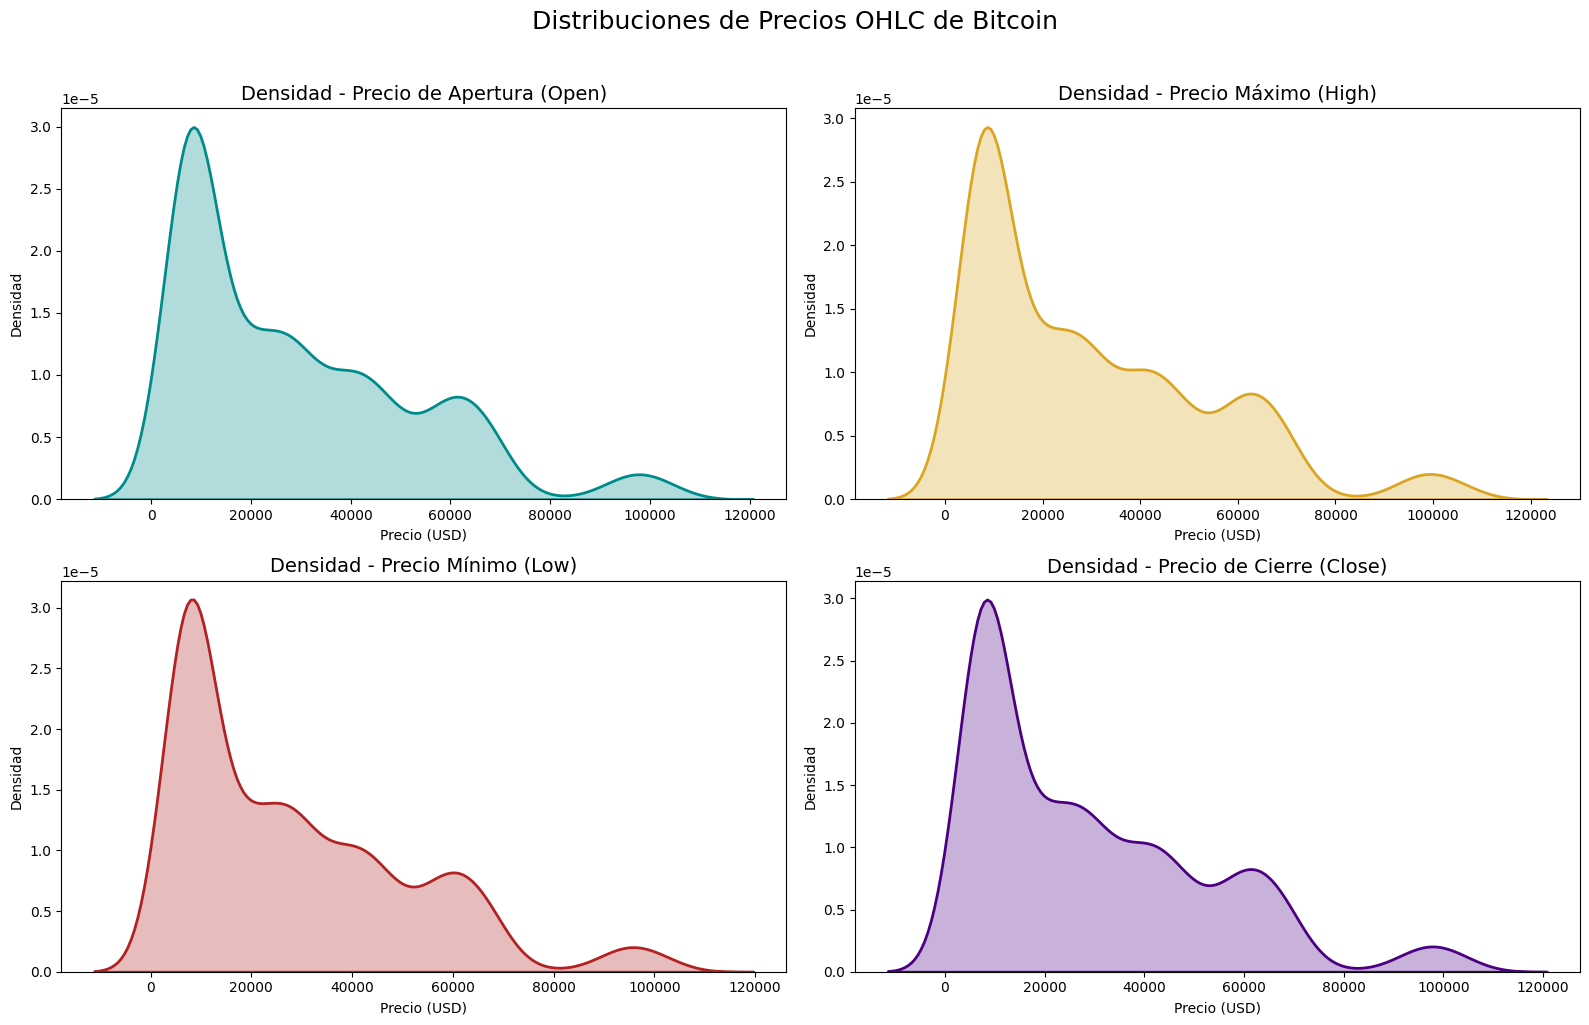

In [4]:
fig, axes = plt.subplots(2, 2, figsize=(16,10))

# Open
sns.kdeplot(btc["Open"].dropna(), color="darkcyan", linewidth=2, fill=True, alpha=0.3, ax=axes[0,0])
axes[0,0].set_title("Densidad - Precio de Apertura (Open)", fontsize=14)
axes[0,0].set_xlabel("Precio (USD)")
axes[0,0].set_ylabel("Densidad")

# High
sns.kdeplot(btc["High"].dropna(), color="goldenrod", linewidth=2, fill=True, alpha=0.3, ax=axes[0,1])
axes[0,1].set_title("Densidad - Precio Máximo (High)", fontsize=14)
axes[0,1].set_xlabel("Precio (USD)")
axes[0,1].set_ylabel("Densidad")

# Low
sns.kdeplot(btc["Low"].dropna(), color="firebrick", linewidth=2, fill=True, alpha=0.3, ax=axes[1,0])
axes[1,0].set_title("Densidad - Precio Mínimo (Low)", fontsize=14)
axes[1,0].set_xlabel("Precio (USD)")
axes[1,0].set_ylabel("Densidad")

# Close
sns.kdeplot(btc["Close"].dropna(), color="indigo", linewidth=2, fill=True, alpha=0.3, ax=axes[1,1])
axes[1,1].set_title("Densidad - Precio de Cierre (Close)", fontsize=14)
axes[1,1].set_xlabel("Precio (USD)")
axes[1,1].set_ylabel("Densidad")

plt.suptitle("Distribuciones de Precios OHLC de Bitcoin", fontsize=18, y=1.02)
plt.tight_layout()
plt.show()


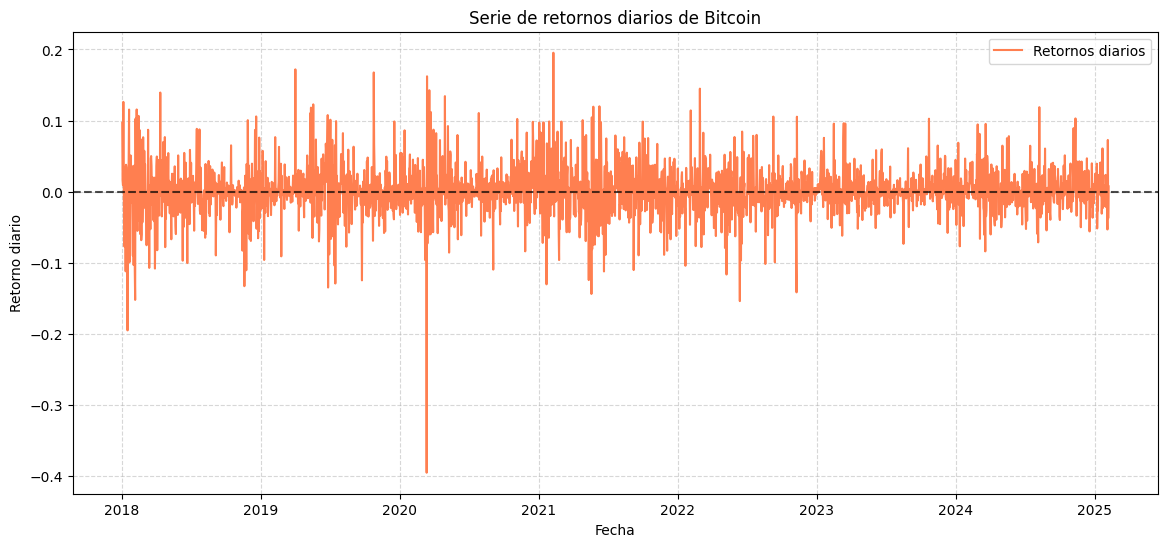

In [5]:

# Retornos diarios
btc["return"] = btc["Close"].pct_change()

plt.figure(figsize=(14,6))
plt.plot(btc["Open time"], btc["return"], label="Retornos diarios", color="coral")
plt.axhline(0, color="black", linestyle="--", alpha=0.7)
plt.title("Serie de retornos diarios de Bitcoin")
plt.xlabel("Fecha")
plt.ylabel("Retorno diario")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()


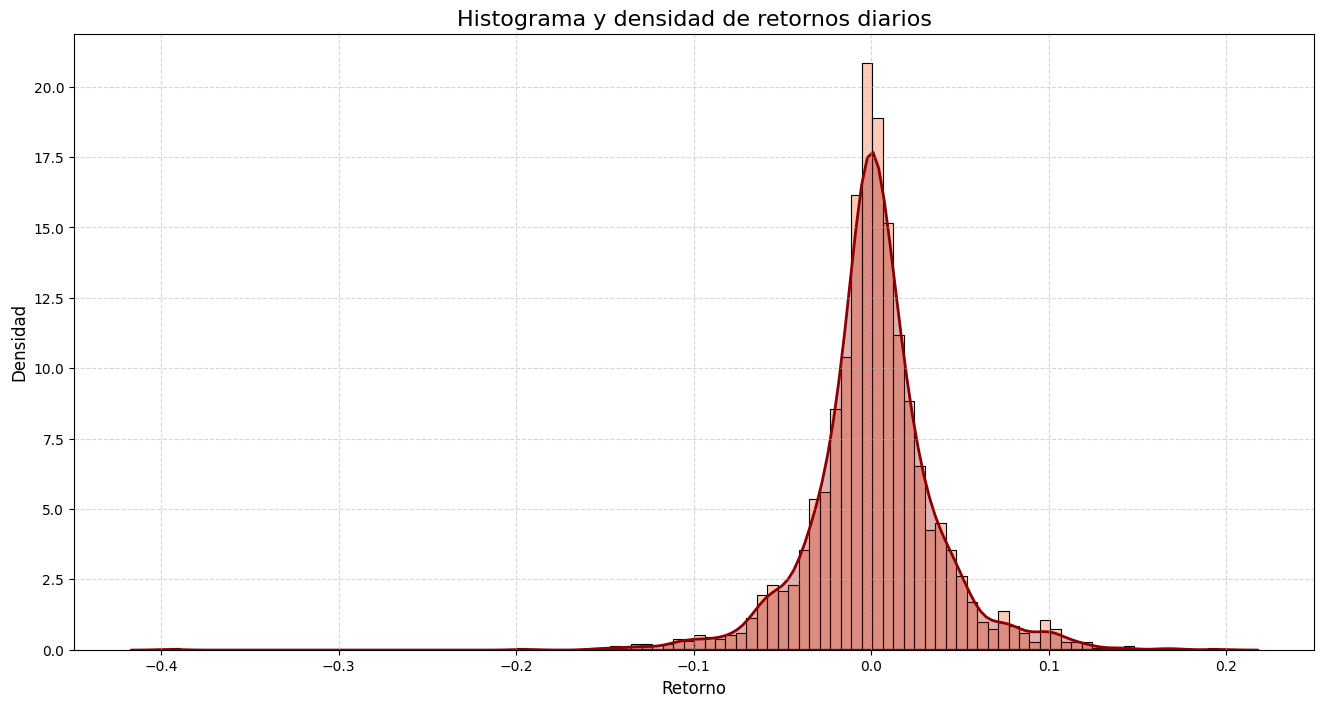

In [6]:
plt.figure(figsize=(16,8))
sns.histplot(btc["return"].dropna(), bins=100, color="coral", stat="density", alpha=0.4)  # histograma transparente
sns.kdeplot(btc["return"].dropna(), color="darkred", linewidth=2, fill=True, alpha=0.3)   # curva con relleno
plt.title("Histograma y densidad de retornos diarios", fontsize=16)
plt.xlabel("Retorno", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [7]:
# Estadísticas descriptivas de precios OHLC
desc_precios = btc[["Open", "High", "Low", "Close"]].describe().T

# Estadísticas descriptivas de retornos
desc_rets = btc["return"].describe()

# Extra: skewness y kurtosis de retornos
extra_stats = pd.Series({
    "skewness": btc["return"].skew(),
    "kurtosis": btc["return"].kurt()
}, name="Retornos")

# Unir todo en un DataFrame ordenado
stats_df = desc_precios.copy()
stats_df_rets = pd.DataFrame(desc_rets).T
stats_df_rets.index = ["Retornos"]

# Agregar skew y kurtosis
stats_df_rets = pd.concat([stats_df_rets, extra_stats.to_frame().T])

# Concatenar precios + retornos
final_stats = pd.concat([stats_df, stats_df_rets], axis=0)

final_stats

,count,mean,std,min,25%,50%,75%,max,skewness,kurtosis
Open,2594.0,29057.847182,23539.635421,3211.710000,9067.985000,22712.950000,43484.365000,106143.820000,NaN,NaN
High,2594.0,29743.249383,24046.515394,3276.500000,9261.240000,23252.895000,44293.657500,108353.000000,NaN,NaN
Low,2594.0,28327.995451,23021.304519,3156.260000,8765.000000,22257.575000,42487.500000,105321.490000,NaN,NaN
Close,2594.0,29090.193446,23576.229505,3211.720000,9068.840000,22741.115000,43527.390000,106143.820000,NaN,NaN
Retornos,2593.0,0.001418,0.035720,-0.395048,-0.014071,0.000708,0.016437,0.195361,NaN,NaN
Retornos,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.392546,8.717892


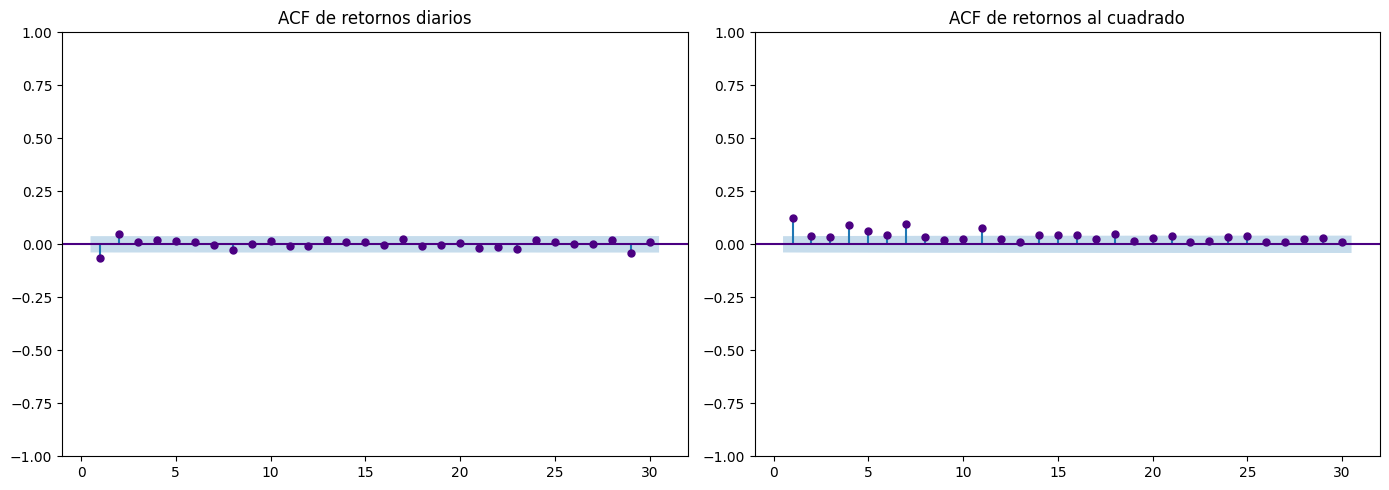

In [8]:
from statsmodels.graphics.tsaplots import plot_acf

fig, axes = plt.subplots(1, 2, figsize=(14,5))

# ACF de retornos
acf1 = plot_acf(btc["return"].dropna(), lags=30, zero=False, ax=axes[0])
axes[0].set_title("ACF de retornos diarios")

# Cambiar colores en ACF 1
for line in acf1.findobj(match=plt.Line2D):
    line.set_color("indigo")  

# ACF de retornos al cuadrado
acf2 = plot_acf(btc["return"].dropna()**2, lags=30, zero=False, ax=axes[1])
axes[1].set_title("ACF de retornos al cuadrado")

# Cambiar colores en ACF 2
for line in acf2.findobj(match=plt.Line2D):
    line.set_color("indigo")

plt.tight_layout()
plt.show()


## **Preprocesamiento y cálculo de features**

Cálculo de retornos logarítmicos (ingresar formula)

In [9]:
# Retornos logarítmicos
btc["LogReturn"] = np.log(btc["Close"] / btc["Close"].shift(1))

# Vista rápida
btc = btc[["Open time", "Close", "LogReturn"]].dropna().reset_index(drop=True)


Cálculo de volatilidad histórica (rolling std) (ingresar formúla)

In [10]:
# Volatilidad móvil de 30 días
btc["Volatility"] = btc["LogReturn"].rolling(window=30).std() * np.sqrt(365)

btc = btc.dropna().reset_index(drop=True)

y_full = btc['Close'].values
volatility_full = btc['Volatility'].values

# Vista rápida
btc[["Open time", 'Close',"LogReturn", 'Volatility']].head()



,Open time,Close,LogReturn,Volatility
0,2018-01-31,10285.10,0.004638,1.355575
1,2018-02-01,9224.52,-0.108831,1.348263
2,2018-02-02,8873.03,-0.038849,1.345556
3,2018-02-03,9199.96,0.036183,1.355471
4,2018-02-04,8184.81,-0.116919,1.307933


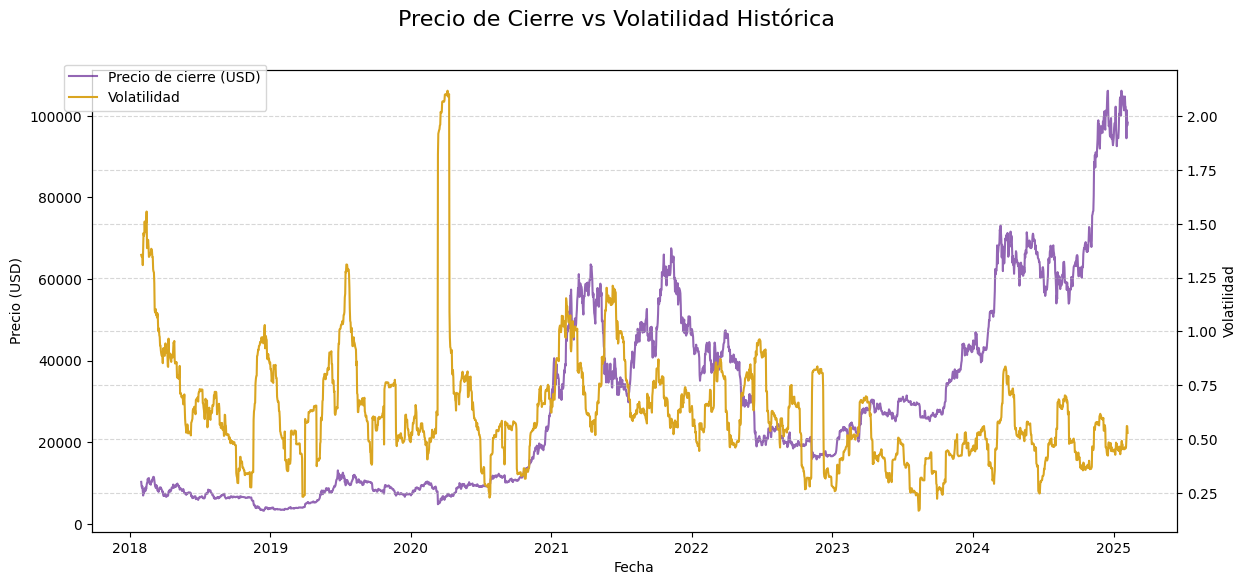

In [11]:
fig, ax1 = plt.subplots(figsize=(14,6))

# Precio
ax1.plot(btc["Open time"], btc["Close"], color="indigo", alpha=0.6, label="Precio de cierre (USD)")
ax1.set_ylabel("Precio (USD)")
ax1.set_xlabel("Fecha")

# Volatilidad (30d)
ax2 = ax1.twinx()
ax2.plot(btc["Open time"], btc["Volatility"], color="goldenrod", label="Volatilidad")
ax2.set_ylabel("Volatilidad")

# Formato de fechas
ax1.xaxis.set_major_locator(mdates.YearLocator())
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

fig.suptitle("Precio de Cierre vs Volatilidad Histórica", fontsize=16)
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


Generación del lags del precio

In [12]:
# Crear lags de precio de cierre
for lag in [7, 14, 21, 28]:
    btc[f"Close_lag_{lag}"] = btc["Close"].shift(lag)

btc[[ "Open time", "Close", "Close_lag_7", "Close_lag_14", "Close_lag_21", "Close_lag_28"]].head(35)


,Open time,Close,Close_lag_7,Close_lag_14,Close_lag_21,Close_lag_28
0,2018-01-31,10285.10,NaN,NaN,NaN,NaN
1,2018-02-01,9224.52,NaN,NaN,NaN,NaN
2,2018-02-02,8873.03,NaN,NaN,NaN,NaN
3,2018-02-03,9199.96,NaN,NaN,NaN,NaN
4,2018-02-04,8184.81,NaN,NaN,NaN,NaN
5,2018-02-05,6939.99,NaN,NaN,NaN,NaN
6,2018-02-06,7652.14,NaN,NaN,NaN,NaN
7,2018-02-07,7599.00,10285.10,NaN,NaN,NaN
8,2018-02-08,7784.02,9224.52,NaN,NaN,NaN
9,2018-02-09,8683.92,8873.03,NaN,NaN,NaN


Generación de targets multi-step (7 días)

In [13]:
# Crear targets multi-step (7 días hacia adelante)
horizon = 7
for h in range(1, horizon+1):
    btc[f"target_t+{h}"] = btc["Close"].shift(-h)

btc[[ "Open time", "Close"] + [f"target_t+{h}" for h in range(1, horizon+1)]].head(15)


,Open time,Close,target_t+1,target_t+2,target_t+3,target_t+4,target_t+5,target_t+6,target_t+7
0,2018-01-31,10285.10,9224.52,8873.03,9199.96,8184.81,6939.99,7652.14,7599.00
1,2018-02-01,9224.52,8873.03,9199.96,8184.81,6939.99,7652.14,7599.00,7784.02
2,2018-02-02,8873.03,9199.96,8184.81,6939.99,7652.14,7599.00,7784.02,8683.92
3,2018-02-03,9199.96,8184.81,6939.99,7652.14,7599.00,7784.02,8683.92,8533.98
4,2018-02-04,8184.81,6939.99,7652.14,7599.00,7784.02,8683.92,8533.98,8063.88
5,2018-02-05,6939.99,7652.14,7599.00,7784.02,8683.92,8533.98,8063.88,8903.00
6,2018-02-06,7652.14,7599.00,7784.02,8683.92,8533.98,8063.88,8903.00,8539.90
7,2018-02-07,7599.00,7784.02,8683.92,8533.98,8063.88,8903.00,8539.90,9449.99
8,2018-02-08,7784.02,8683.92,8533.98,8063.88,8903.00,8539.90,9449.99,10000.09
9,2018-02-09,8683.92,8533.98,8063.88,8903.00,8539.90,9449.99,10000.09,10159.98


In [14]:
btc = btc.dropna().reset_index(drop=True)

btc.head(15)


,Open time,Close,LogReturn,Volatility,Close_lag_7,Close_lag_14,Close_lag_21,Close_lag_28,target_t+1,target_t+2,target_t+3,target_t+4,target_t+5,target_t+6,target_t+7
0,2018-02-28,10326.76,-0.023190,1.370991,10437.60,9449.99,7599.00,10285.10,10920.00,11039.00,11464.48,11515.00,11454.00,10716.48,9910.00
1,2018-03-01,10920.00,0.055857,1.344643,9811.04,10000.09,7784.02,9224.52,11039.00,11464.48,11515.00,11454.00,10716.48,9910.00,9271.64
2,2018-03-02,11039.00,0.010838,1.344961,10131.04,10159.98,8683.92,8873.03,11464.48,11515.00,11454.00,10716.48,9910.00,9271.64,9227.00
3,2018-03-03,11464.48,0.037819,1.288457,9694.51,11039.55,8533.98,9199.96,11515.00,11454.00,10716.48,9910.00,9271.64,9227.00,8770.22
4,2018-03-04,11515.00,0.004397,1.277770,9590.00,10383.43,8063.88,8184.81,11454.00,10716.48,9910.00,9271.64,9227.00,8770.22,9533.57
5,2018-03-05,11454.00,-0.005312,1.274726,10324.00,11153.00,8903.00,6939.99,10716.48,9910.00,9271.64,9227.00,8770.22,9533.57,9131.34
6,2018-03-06,10716.48,-0.066556,1.224051,10569.04,11200.99,8539.90,7652.14,9910.00,9271.64,9227.00,8770.22,9533.57,9131.34,9150.00
7,2018-03-07,9910.00,-0.078238,1.099999,10326.76,10437.60,9449.99,7599.00,9271.64,9227.00,8770.22,9533.57,9131.34,9150.00,8170.00
8,2018-03-08,9271.64,-0.066584,1.087877,10920.00,9811.04,10000.09,7784.02,9227.00,8770.22,9533.57,9131.34,9150.00,8170.00,8240.98
9,2018-03-09,9227.00,-0.004826,1.087572,11039.00,10131.04,10159.98,8683.92,8770.22,9533.57,9131.34,9150.00,8170.00,8240.98,8260.00


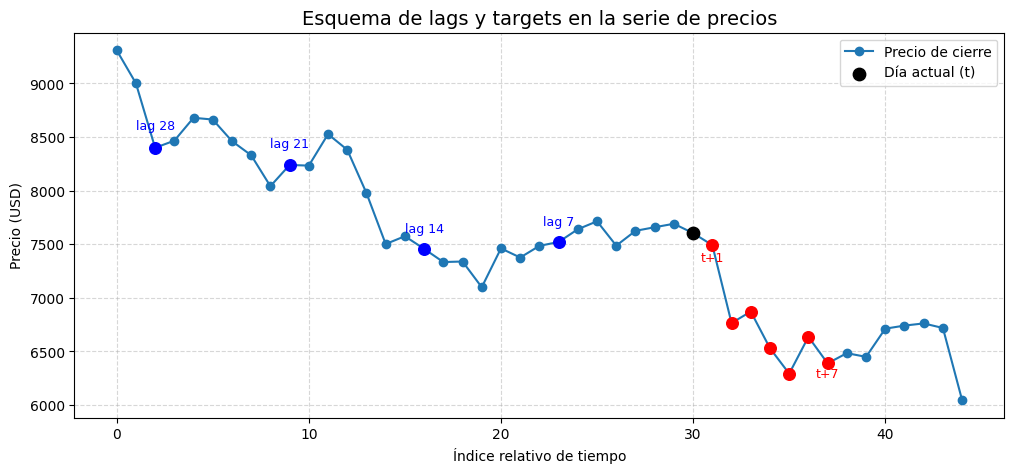

In [15]:
# Ejemplo: fila intermedia (para que existan lags y targets)
i = 100  

ventana_lags = [7, 14, 21, 28]
horizon = 7

# Extraemos un rango de precios alrededor
context = btc["Close"].iloc[i-30:i+15].reset_index(drop=True)

plt.figure(figsize=(12,5))
plt.plot(context, marker="o", label="Precio de cierre")

# Punto actual
plt.scatter(30, context.iloc[30], color="black", s=80, zorder=3, label="Día actual (t)")

# Marcar lags
for lag in ventana_lags:
    idx = 30 - lag
    plt.scatter(idx, context.iloc[idx], color="blue", s=70, zorder=3)
    plt.text(idx, context.iloc[idx]*1.02, f"lag {lag}", fontsize=9, color="blue", ha="center")

# Marcar targets futuros
for h in range(1, horizon+1):
    idx = 30 + h
    plt.scatter(idx, context.iloc[idx], color="red", s=70, zorder=3)
    if h in [1, 7]:  # mostrar algunos para no saturar
        plt.text(idx, context.iloc[idx]*0.98, f"t+{h}", fontsize=9, color="red", ha="center")

plt.title("Esquema de lags y targets en la serie de precios", fontsize=14)
plt.xlabel("Índice relativo de tiempo")
plt.ylabel("Precio (USD)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()


In [16]:
btc.to_csv(r'Data\btc_1d_with_volatility_and_lags.csv', index=False)